In [1]:
%run "../../../PyUtils/common.ipynb"
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcess
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import ensemble
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.formula.api as smf
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB


patient = "hand2"
ampm = "pm"
file = "http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20calculated_jlee%20WHERE%20ampm=%27"+ampm+"%27%20AND%20pname=%27"+patient+"%27%20ORDER%20BY%20date,%20time"

lowerPercent = 0.20
upperPercent = 0.80

fileName = file;

dfOriginal = LoadDataSet(fileName, checkForDateTime=False);
#displayDFs (dfOriginal, maxrows=3 )
#for c in dfOriginal.columns: print (c,  end=', ')
dfOriginal

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,pname,date,ampm,time,pef,pef_zone,tm_window,so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min,temperature_diff,airpressure_diff,precipitation_diff
0,hand2,2015-01-02,pm,17:30:00,263,Y,23.067,0.006,0.900,0.026,0.035,54.000,0.088,13.590,0.388,0.404,647.867,0.004,0.589,0.017,0.018,28.087,-2.500,2.500,290.000,33.000,1.700,-16.600,1021.700,1026.100,-3.000,-0.800,1022.200,68.000,-8.300,1019.900,31.000,7.500,2.300,37.000
1,hand2,2015-01-03,pm,18:15:00,265,Y,24.750,0.013,1.000,0.018,0.039,54.000,0.172,19.000,0.222,0.718,949.250,0.007,0.768,0.009,0.029,38.354,1.200,1.500,160.000,60.000,4.000,-5.700,1017.100,1021.400,-1.000,1.900,1023.400,71.000,-9.600,1017.100,33.000,11.500,6.300,38.000
2,hand2,2015-01-04,pm,18:05:00,269,Y,23.833,0.009,1.200,0.021,0.055,71.000,0.147,17.317,0.160,0.862,904.750,0.006,0.727,0.007,0.036,37.962,3.400,0.800,270.000,76.000,5.900,-0.400,1014.400,1018.700,-0.100,7.600,1017.100,76.000,0.200,1012.900,59.000,7.400,4.200,17.000
3,hand2,2015-01-05,pm,18:09:00,249,Y,24.067,0.015,1.300,0.008,0.069,109.000,0.166,25.268,0.069,1.316,1750.000,0.007,1.050,0.003,0.055,72.715,6.800,0.000,0.000,56.000,5.600,-1.300,1010.400,1014.600,0.100,9.100,1017.500,100.000,-2.800,1010.400,48.000,11.900,7.100,52.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,hand2,2016-10-15,pm,17:52:00,298,G,23.800,0.005,1.100,0.045,0.065,108.000,0.086,19.393,0.301,1.046,1987.333,0.004,0.815,0.013,0.044,83.501,23.200,0.900,20.000,44.000,12.400,10.200,1019.300,1023.200,19.700,26.100,1023.500,100.000,11.200,1019.300,35.000,14.900,4.200,65.000
653,hand2,2016-10-16,pm,19:08:00,298,G,25.267,0.004,1.100,0.028,0.059,78.000,0.093,17.133,0.295,0.942,1527.533,0.004,0.678,0.012,0.037,60.456,16.300,0.700,70.000,98.000,18.100,15.900,1013.100,1017.100,16.700,23.200,1020.100,100.000,16.200,1013.100,44.000,7.000,7.000,56.000
654,hand2,2016-10-17,pm,18:21:00,260,Y,23.217,0.004,0.700,0.055,0.037,72.000,0.059,13.430,0.359,0.652,1233.783,0.003,0.578,0.015,0.028,53.142,18.200,2.500,270.000,80.000,16.600,14.600,1013.800,1017.800,17.600,22.400,1014.600,100.000,14.700,1012.600,55.000,7.700,2.000,45.000
655,hand2,2016-10-18,pm,18:01:00,281,Y,23.667,0.006,0.900,0.032,0.064,86.000,0.086,13.802,0.315,0.725,1337.400,0.004,0.583,0.013,0.031,56.510,17.000,0.000,0.000,83.000,16.000,14.000,1015.000,1019.000,16.000,20.800,1018.100,100.000,11.000,1013.800,61.000,9.800,4.300,39.000


In [2]:
#Break into groups by percentage

dfOriginal.sort_values(by='pef', ascending=True, inplace=True)
dfOriginal.reset_index(drop=True, inplace=True)
numberOfElements = len(dfOriginal)
upperBoundary = upperPercent*numberOfElements
lowerBoundary = lowerPercent*numberOfElements
dfOriginal['percent_group']=-1

for i in dfOriginal.index:

    if i < lowerBoundary:
        dfOriginal['percent_group'][i] = 0

    elif i > upperBoundary : 
        dfOriginal['percent_group'][i] = 2

    else:
        dfOriginal['percent_group'][i] = 1

print(dfOriginal)

     pname        date ampm      time  pef pef_zone  tm_window  so2_max  co_max  o3_max  no2_max  pm10_max  so2_sum  co_sum  o3_sum  no2_sum  pm10_sum  so2_avg  co_avg  o3_avg  no2_avg  pm10_avg  temperaturec  windspeedms  winddirection  precipitationpercent  vaporpressurehpa  dewpointtemperaturec  airpressurehpa  sealevelpressurehpa  groundtemperaturec  temperature_max  airpressure_max  precipitation_max  temperature_min  airpressure_min  precipitation_min  temperature_diff  airpressure_diff  precipitation_diff  percent_group
0    hand2  2015-03-22   pm  18:11:00  180        R     23.367    0.016   1.100   0.064    0.075   264.000    0.160  18.257   0.625    0.902  3699.850    0.007   0.781   0.027    0.039   158.339         7.900        5.100        270.000                49.000             5.200                -2.100        1017.000             1021.200               6.600           15.000         1017.400            100.000            2.100         1009.800             25.000      

In [3]:
df=dfOriginal.copy()

#1. Remove all the rows that does not have any pef values 

df=df.reset_index(drop=True)

#2. Combine 
df=df.fillna(0)
sdttm = df.date + " " + df.time
df.insert(0, 'sdttm', sdttm)
df.sdttm = pd.to_datetime(df.sdttm)

df.sort_values(by='sdttm', ascending=True, inplace=True)
drps  = "pef_zone,cname, pname, date, time, ampm, timeofday, dateofmeasure, npt, pef1, pef2, pef3, temperature_diff, airpressure_diff, precipitation_diff, tm_window".split(', ')
df=df.drop(drps, axis=1, errors='ignore')
df=df.reset_index(drop=True)

## <== do the following for SAP PA tool
#pef = df.pef;
#df=df.drop(['pef'], axis=1)
#df.insert(1, 'pef1', pef)

#pef[-10:]=0     # Set last 10 to zero for predictions
#df.insert(1, 'pef', pef)
#df.to_csv("HanD/hand1.csv", sep=';')

df1 = df.copy()
df1 = df1.set_index(df1.sdttm)
df1=df1.drop('sdttm', axis=1, errors='ignore')

nq = 5
lnq=list(range(0,nq))
s= pd.qcut(df1.pef, nq, labels=lnq )
df1.insert(1,"pefcat", s)
df1.pefcat = df1.pefcat.astype(str)





columns =  '''so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,
 temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min,percent_group'''

#'''pefcat,pef_zone,so2_max,co_max,o3_max,no2_max,temperaturec,windspeedms,precipitationpercent,vaporpressurehpa,
#dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,temperature_min'''

 
#amin,pmin,tmaxlesstmin,amaxlessamin,pmaxlesspmin'''
cs = [c.strip() for c in columns.split(',')]

df1=df1[cs]
#HTML(df1.to_html())
#displayDFs (df1, maxrows=3 )
df1

,so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min,percent_group
sdttm,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-02 17:30:00,0.006,0.900,0.026,0.035,54.000,0.088,13.590,0.388,0.404,647.867,0.004,0.589,0.017,0.018,28.087,-2.500,2.500,290.000,33.000,1.700,-16.600,1021.700,1026.100,-3.000,-0.800,1022.200,68.000,-8.300,1019.900,31.000,1
2015-01-03 18:15:00,0.013,1.000,0.018,0.039,54.000,0.172,19.000,0.222,0.718,949.250,0.007,0.768,0.009,0.029,38.354,1.200,1.500,160.000,60.000,4.000,-5.700,1017.100,1021.400,-1.000,1.900,1023.400,71.000,-9.600,1017.100,33.000,1
2015-01-04 18:05:00,0.009,1.200,0.021,0.055,71.000,0.147,17.317,0.160,0.862,904.750,0.006,0.727,0.007,0.036,37.962,3.400,0.800,270.000,76.000,5.900,-0.400,1014.400,1018.700,-0.100,7.600,1017.100,76.000,0.200,1012.900,59.000,1
2015-01-05 18:09:00,0.015,1.300,0.008,0.069,109.000,0.166,25.268,0.069,1.316,1750.000,0.007,1.050,0.003,0.055,72.715,6.800,0.000,0.000,56.000,5.600,-1.300,1010.400,1014.600,0.100,9.100,1017.500,100.000,-2.800,1010.400,48.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-15 17:52:00,0.005,1.100,0.045,0.065,108.000,0.086,19.393,0.301,1.046,1987.333,0.004,0.815,0.013,0.044,83.501,23.200,0.900,20.000,44.000,12.400,10.200,1019.300,1023.200,19.700,26.100,1023.500,100.000,11.200,1019.300,35.000,2
2016-10-16 19:08:00,0.004,1.100,0.028,0.059,78.000,0.093,17.133,0.295,0.942,1527.533,0.004,0.678,0.012,0.037,60.456,16.300,0.700,70.000,98.000,18.100,15.900,1013.100,1017.100,16.700,23.200,1020.100,100.000,16.200,1013.100,44.000,2
2016-10-17 18:21:00,0.004,0.700,0.055,0.037,72.000,0.059,13.430,0.359,0.652,1233.783,0.003,0.578,0.015,0.028,53.142,18.200,2.500,270.000,80.000,16.600,14.600,1013.800,1017.800,17.600,22.400,1014.600,100.000,14.700,1012.600,55.000,1
2016-10-18 18:01:00,0.006,0.900,0.032,0.064,86.000,0.086,13.802,0.315,0.725,1337.400,0.004,0.583,0.013,0.031,56.510,17.000,0.000,0.000,83.000,16.000,14.000,1015.000,1019.000,16.000,20.800,1018.100,100.000,11.000,1013.800,61.000,1


In [4]:
# from sklearn.neural_network import MLPClassifier
# nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

# clf = nn;

# Y_SCALER = None
# #Normalize the input and save the scalar for outcome variable "pefmax" in this case.
# scaler = StandardScaler()
# dp = prepareDF(df1, True)
# for c in dp.columns:
#     if ( c == 'pefcat'):
#         #Y_SCALER = StandardScaler()
#         #dp[c] = Y_SCALER.fit_transform(dp[c])
#         pass;
#     else:
#         dp[c] = scaler.fit_transform(dp[c])
        
# #dp = dp["so2,pef,o3,co,no2,pm10,tmax".split(',')]
# dp1 = dp.set_index(pd.Series(range(0,len(dp)) ) )

# X = dp1.ix[:, dp1.columns != 'pefcat']
# y = dp1.pefcat 
# X = X.as_matrix().astype(np.float)


# kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True)
# y_pred = y.copy()

# # Iterate through folds\
# i = 0;
# for train_index, test_index in kf.split(X):
#     #print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train = y[train_index]
#     # Initialize a classifier with key word arguments\
#     print ("*",i, end ="");
#     clf.fit(X_train,y_train)
#     y_pred[test_index] = clf.predict(X_test)
#     i = i +1;



Feature space holds 656 observations and 30 features
Unique target labels: [1 2 0]
* 0* 1* 2* 3* 4*
   DecisionTree Gini accuracy: 0.576220 
   DecisionTree Gini r^2 score: -0.216737
* 0* 1* 2* 3* 4*
   DecisionTree Entr accuracy: 0.570122 
   DecisionTree Entr r^2 score: -0.220539
* 0* 1* 2* 3* 4*
                 SVM accuracy: 0.599085 
                 SVM r^2 score: -0.000006
* 0* 1* 2* 3* 4*
       Random Forest accuracy: 0.568598 
       Random Forest r^2 score: -0.281376
* 0* 1* 2* 3* 4*
                K-NN accuracy: 0.550305 
                K-NN r^2 score: -0.372632
* 0* 1* 2* 3* 4*
   Gradient Boosting accuracy: 0.547256 
   Gradient Boosting r^2 score: -0.368829
* 0* 1* 2* 3* 4*
    Logit Regression accuracy: 0.592988 
    Logit Regression r^2 score: -0.072250
* 0* 1* 2* 3* 4*
         Naive Bayes accuracy: 0.373476 
         Naive Bayes r^2 score: -1.349824


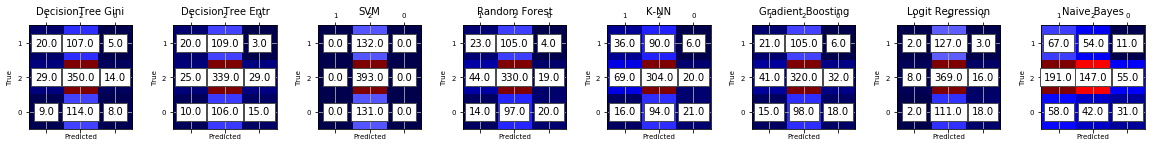

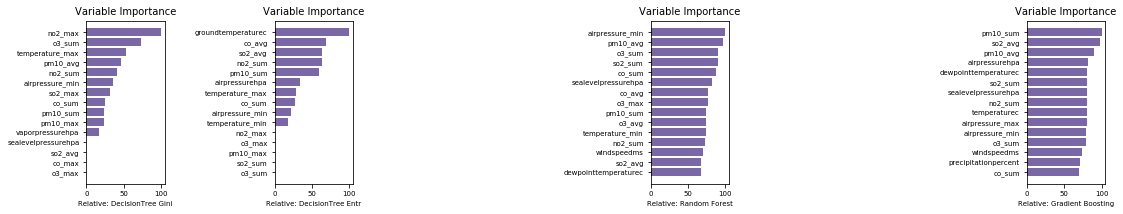

DecisionTree Gini Metrics
             precision    recall  f1-score   support

    class 0       0.34      0.15      0.21       132
    class 1       0.61      0.89      0.73       393
    class 2       0.30      0.06      0.10       131

avg / total       0.50      0.58      0.50       656

DecisionTree Entr Metrics
             precision    recall  f1-score   support

    class 0       0.36      0.15      0.21       132
    class 1       0.61      0.86      0.72       393
    class 2       0.32      0.11      0.17       131

avg / total       0.50      0.57      0.51       656

SVM Metrics
             precision    recall  f1-score   support

    class 0       0.00      0.00      0.00       132
    class 1       0.60      1.00      0.75       393
    class 2       0.00      0.00      0.00       131

avg / total       0.36      0.60      0.45       656

Random Forest Metrics
             precision    recall  f1-score   support

    class 0       0.28      0.17      0.22       132
   

In [5]:
from sklearn.naive_bayes import GaussianNB

predictColumn = "pefcat"
predictColumn = "pef_zone"
predictColumn = "percent_group"

if ( 'pefcat' in df1.columns ):
    df1.pefcat = df1.pefcat.astype(int)
    df1=df1.drop('pefcat', axis=1)

cls = [# Comment/uncomment out any classfiers according to your need 
       # DO NOT CHANGE
        "DecisionTree Gini" , tree.DecisionTreeClassifier(max_depth=4, criterion="gini"),
        "DecisionTree Entr" , tree.DecisionTreeClassifier(max_depth=4, criterion="entropy"), 
        "SVM"               , sklearn.svm.SVC(kernel="linear"), 
#        "SVM1"              , SVC(kernel="rbf", C=10**3),
        "Random Forest"     , sklearn.ensemble.RandomForestClassifier(),
        "K-NN"              , sklearn.neighbors.KNeighborsClassifier(),
        "Gradient Boosting" , sklearn.ensemble.RandomForestClassifier(),
        "Logit Regression"  , sklearn.linear_model.LogisticRegression(),
#        "Neural NW"         , MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25, 10), random_state=1),
        "Naive Bayes"       , GaussianNB()
];

y = df1[predictColumn]
X = df1.drop(predictColumn, axis=1)
a = Classify(X,y, True, drawConfusionMatrix=True, classifiers=cls, scale=True)

for i in cls:
    if type(i) is str:
        y_pred = a[4][i]
        target_names = ['class 0', 'class 1', 'class 2']
        print(i + ' Metrics')
        y.replace(to_replace="R", value=0, inplace=True, limit=None, regex=False, method='pad', axis=None)
        y.replace(to_replace="Y", value=1, inplace=True, limit=None, regex=False, method='pad', axis=None)
        print(classification_report(y, y_pred, target_names=target_names))


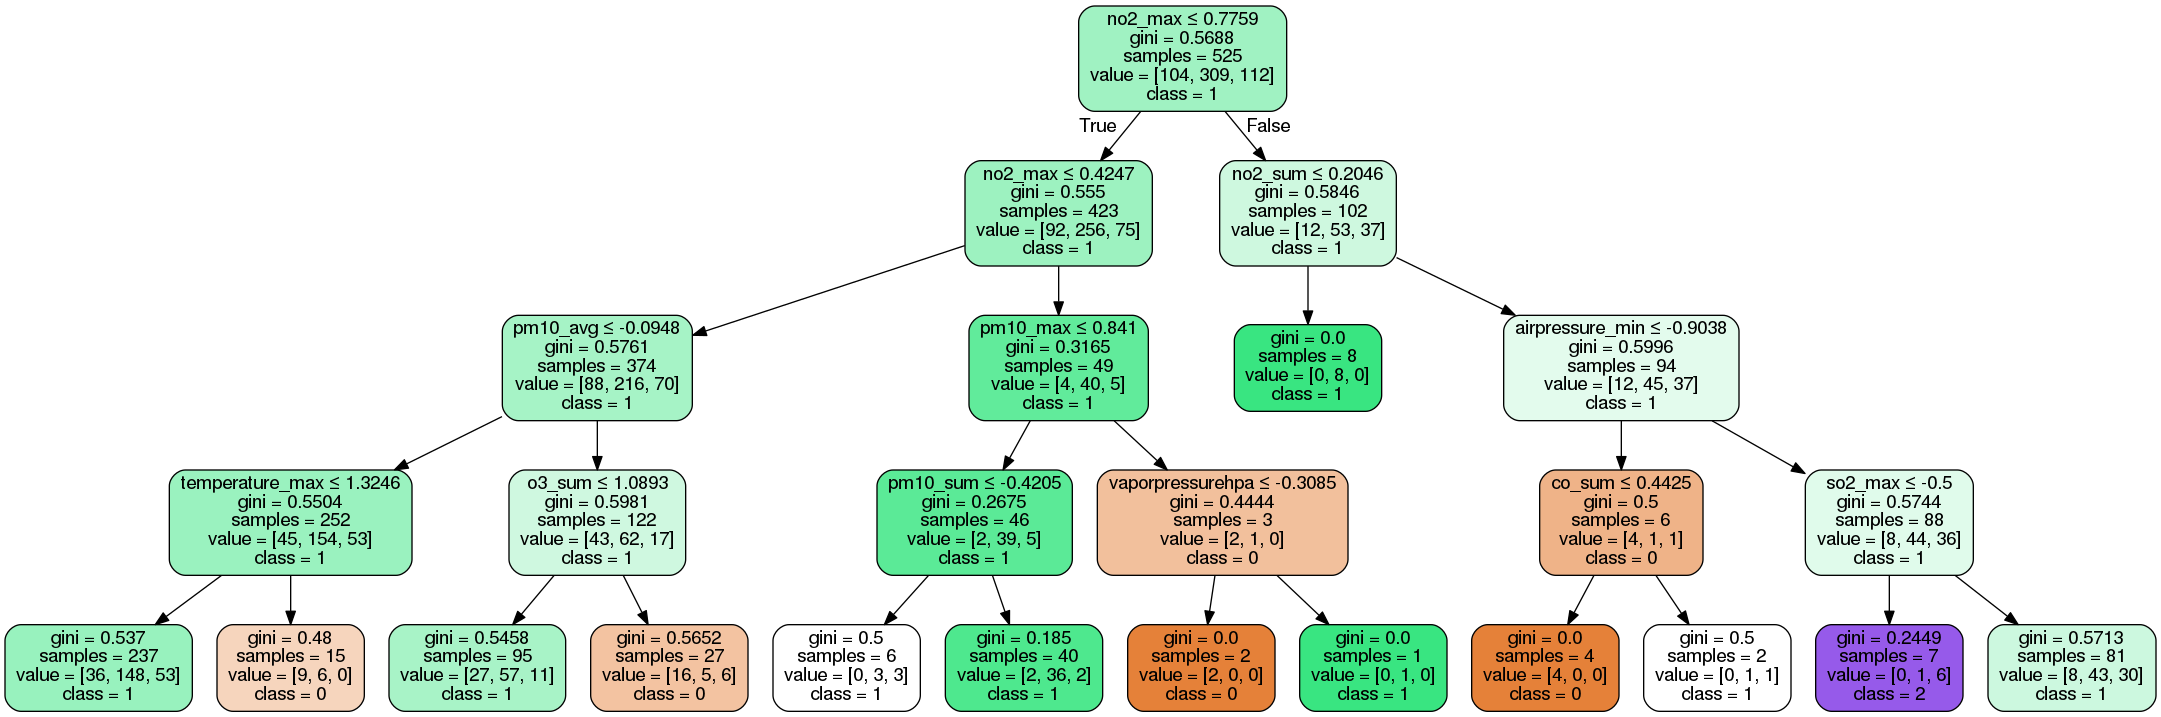

In [6]:
#(X1,y1,ra,cls) = Classify1(X,y, True, drawConfusionMatrix=True, classifiers=cls, scale=False)
DrawDecisionTree(X,y, cls[1])
